# Tugas Akhir Semester (Mandiri)
## AS 3111 Mekanika Benda Langit

Tenggat pengumpulan : **14 Desember 2022 pukul 23.59 WIB**

### Nama : Gishelawati
### NIM : 10319046

## Problem 1 - Metode Numerik Penentuan Titik Lagrange

![image.png](attachment:image.png)

Penentukan titik Langrange sudah teman-teman lakukan dengan beberapa asumsi penting seperti $M_1 >> M_2$ dan $x<<a$. Sementara itu untuk penentuan radius _Roche Lobe_ pada bintang ganda dekat tidak dapat menggunakan asumsi ini akibat rasio massa yang besar dan jarak titik lagrange terhadap jejari orbit tidak dapat diabaikan lagi.

####Penentuan $L_1$
Dari gambar yang terdapat pada bagian sebelumnya, kita dapat menyusun persamaan gerak untuk benda yang berada di titik $L_1$ dengan membuat hubungan antara percepatan gravitasi akibat $M_1$ ($g_1$), $M_2$ ($g_2$), dan percepatan sentrifugal $a_c$, untuk $L_1$ maka didapatkan persamaan berikut :

### $$
a_1 - a_2 = a_c \\
\frac{GM_1}{(r_1+r_{L1})^2} - \frac{GM_2}{(r_2-r_{L1})^2} = \frac{G(M_1+M_2)r_{L1}}{a^3}
$$
### $$
\frac{M_1}{(r_1+r_{L1})^2} - \frac{M_2}{(r_2-r_{L1})^2} = \frac{M_1r_{L1}}{a^2r_2}
$$
Seluruh parameter sebelumnya bisa ditentukan dari Hukum Kepler, kecuali $r_{L1}$, sehingga dilakukan iterasi hingga menghasilkan kurva berikut
![image-3.png](attachment:image-3.png)

####Penentuan $L_3$
Dari gambar yang terdapat pada bagian sebelumnya, kita dapat menyusun persamaan gerak untuk benda yang berada di titik $L_3$ dengan membuat hubungan antara percepatan gravitasi akibat $M_1$ ($g_1$), $M_2$ ($g_2$), dan percepatan sentrifugal $a_c$, untuk $L_3$ maka didapatkan persamaan berikut :

### $$
a_1 + a_2 = a_c \\
\frac{GM_1}{(r_{L3}-r_1)^2} + \frac{GM_2}{(r_2+r_{L3})^2} = \frac{G(M_1+M_2)r_{L3}}{a^3}
$$
### $$
\frac{M_1}{(r_{L3}-r_1)^2} + \frac{M_2}{(r_2+r_{L3})^2} = \frac{M_1r_{L3}}{a^2r_2}
$$

#### 1. Dengan menggunakan _salah satu_ bintang ganda yang terdapat pada _paper_ ini, tentukan jarak titik $L_1$, $L_3$, terhadap pusat massa dengan menggunakan metode numerik ini hingga selisih nilai suku kiri dan kanan persamaan $<10^{-4}$

_paper_ :  https://doi.org/10.1111/j.1365-2966.2010.18016.x

Pilih _salah satu_ pasangan bintang ganda gerhana pada _paper_ yang sesuai dengan **dua digit terakhir NIM kamu**

Bintang yang digunakan yaitu 164121+0030.4


In [ ]:
#fungsi untuk mencari titik langrange

#suku kiri L1
def L1ki(m1, m2, r1, r2, x):
  return (m1/(r1+x)**2)-(m2/(x-r2)**2)

#suku kiri L3
def L3ki(m1, m2, r1, r2, x):
  return (m1/(x-r1)**2)+(m2/(r2+x)**2)

#suku kanan L1 dan L3
#L1kanan=L3kanan=Lka
def Lka(m1, r2, a, x):
  return (m1*x)/((a**2)*r2)

In [ ]:
#parameter bintang
m1 = 1.524 #msun dengan m1>m2
m2 = 0.511 #msun
a = 3.15 #rsun
r1 = (m2/(m1+m2))*a #rsun
r2 = a-r1 #rsun

In [ ]:
### Langrange 1

#Tebakan awal L1
L1a = 0 #rsun, batas bawah tebakkan L1
L1b = 3 #rsun, batas atas tebakkan L1

#menghitung nilai dari tebakkan awal
#suku kiri
kiria = L1ki(m1, m2, r1, r2, L1a)
kirib = L1ki(m1, m2, r1, r2, L1b)
#suku kanan
kanana = Lka(m1,r2,a,L1a)
kananb = Lka(m1,r2,a,L1b)
#selisih nilai kiri dan nilai kanan
nilaia = kiria - kanana
nilaib = kirib - kananb

#iterasi nilai tebakkan
if nilaia*nilaib < 0 :
  L1m = 0.5*(L1a + L1b) #ambil nilai tengah
  #hitung nilai dititik tengah
  kirim = L1ki(m1, m2, r1, r2, L1m)
  kananm = Lka(m1,r2,a,L1m)
  nilaim = kirim - kananm

  iteration = 1
  selisih = abs (nilaim) #validasi

  print (f'Jarak L1 dari pusat massa sistem bintang ganda 164121+0030.4')
  print (f'____________________________')
  print ('iterasi\t\tL1(rsun)\tselisih')
  print (f'____________________________')
  print (f'{iteration}\t\t{L1m:.5f}\t\t{selisih:.10f}')

  while selisih > 10**(-4) : #jika selisih = 10**(-4) maka program akan berhenti
    kiria = L1ki(m1, m2, r1, r2, L1a)
    kanana = Lka(m1,r2,a,L1a)
    nilaia = kiria - kanana
    iteration +=1

    if (nilaia*nilaim < 0):
      L1b = L1m
    elif (nilaia*nilaim > 0):
      L1a = L1m

    L1m = 0.5*(L1a + L1b)
    kirim = L1ki(m1, m2, r1, r2, L1m)
    kananm = Lka(m1,r2,a,L1m)
    nilaim = kirim - kananm
    selisih = abs(nilaim)
    print (f'{iteration}\t\t{L1m:.5f}\t\t{selisih:.10f}')

  print ('____________________________')
  print ('selesai')
  print ('____________________________')
  print ('Jarak L1 dari pusat massa sistem bintang ganda 164121+0030.4 adalah %.5f'%L1m+'rsun')
  print ('____________________________')






Jarak L1 dari pusat massa sistem bintang ganda 164121+0030.4
____________________________
iterasi		L1(rsun)	selisih
____________________________
1		1.50000		0.4997944770
2		0.75000		0.3955755604
3		1.12500		0.0063342228
4		1.31250		0.2076013177
5		1.21875		0.0950450379
6		1.17188		0.0433324401
7		1.14844		0.0182843293
8		1.13672		0.0059261918
9		1.13086		0.0002156427
10		1.13379		0.0028522949
11		1.13232		0.0013175904
12		1.13159		0.0005507911
13		1.13123		0.0001675286
14		1.13104		0.0000240684
____________________________
selesai
____________________________
Jarak L1 dari pusat massa sistem bintang ganda 164121+0030.4 adalah 1.13104rsun
____________________________


In [ ]:
### Langrange 3

#Tebakan awal L3
L3a = 0 #rsun, batas bawah tebakkan L3
L3b = 6 #rsun, batas atas tebakkan L3

#menghitung nilai dari tebakkan awal
#suku kiri
kiria = L3ki(m1, m2, r1, r2, L3a)
kirib = L3ki(m1, m2, r1, r2, L3b)
#suku kanan
kanana = Lka(m1,r2,a,L3a)
kananb = Lka(m1,r2,a,L3b)
#selisih nilai kiri dan nilai kanan
nilaia = kiria - kanana
nilaib = kirib - kananb

#iterasi nilai tebakkan
if nilaia*nilaib < 0 :
  L3m = 0.5*(L3a + L3b) #ambil nilai tengah
  #hitung nilai dititik tengah
  kirim = L3ki(m1, m2, r1, r2, L3m)
  kananm = Lka(m1,r2,a,L3m)
  nilaim = kirim - kananm

  iteration = 1
  selisih = abs (nilaim) #validasi

  print (f'Jarak L3 dari pusat massa sistem bintang ganda 164121+0030.4')
  print (f'____________________________')
  print ('iterasi\t\tL3(rsun)\tselisih')
  print (f'____________________________')
  print (f'{iteration}\t\t{L3m:.5f}\t\t{selisih:.10f}')

  while selisih > 10**(-4) : #jika selisih = 10**(-4) maka program akan berhenti
    kiria = L3ki(m1, m2, r1, r2, L3a)
    kanana = Lka(m1,r2,a,L3a)
    nilaia = kiria - kanana
    iteration +=1

    if (nilaia*nilaim < 0):
      L3b = L3m
    elif (nilaia*nilaim > 0):
      L3a = L3m

    L3m = 0.5*(L3a + L3b)
    kirim = L3ki(m1, m2, r1, r2, L3m)
    kananm = Lka(m1,r2,a,L3m)
    nilaim = kirim - kananm
    selisih = abs(nilaim)
    print (f'{iteration}\t\t{L3m:.5f}\t\t{selisih:.10f}')

  print ('____________________________')
  print ('selesai')
  print ('____________________________')
  print ('Jarak L3 dari pusat massa sistem bintang ganda 164121+0030.4 adalah %.5f'%L3m+'rsun')
  print ('____________________________')






Jarak L3 dari pusat massa sistem bintang ganda 164121+0030.4
____________________________
iterasi		L3(rsun)	selisih
____________________________
1		3.00000		0.1347804134
2		4.50000		0.1713417280
3		3.75000		0.0564053458
4		3.37500		0.0240444339
5		3.56250		0.0189694745
6		3.46875		0.0017426431
7		3.51562		0.0087986191
8		3.49219		0.0035758859
9		3.48047		0.0009288031
10		3.47461		0.0004038482
11		3.47754		0.0002632421
12		3.47607		0.0000701114
____________________________
selesai
____________________________
Jarak L3 dari pusat massa sistem bintang ganda 164121+0030.4 adalah 3.47607rsun
____________________________


#### 2. Dengan persamaan titik Lagrange yang sudah kamu pelajari, tentukan galat absolut ($\epsilon$) antara nilai numerik dan analitik!

### $$
\epsilon = \frac{|r_{numerik}-r_{analitik}|}{r_{numerik}}
$$

In [ ]:
#galat absolut L1
L1 = a*(1- (m2/(3*m1))**(1/3)) #perhitungan L1 analitik dengan asumsi m2<<m1
absgalat = abs(L1m - L1)/L1m
print('Galat absolut titik L1 adalah %.5f'%absgalat)

Galat absolut titik L1 adalah 0.44350


In [ ]:
#galat absolut L3
L3 = r2*(1+((17*m2)/(12*m1))) #perhitungan L3 analitik dengan asumsi m2<<m1
absgalat = abs(L3m - L3)/L3m
print('Galat absolut titik L3 adalah %.5f'%absgalat)

Galat absolut titik L3 adalah 0.00101


#### 3. Tentukan jarak $L_1$ sistem Matahari-Jupiter dengan metode numerik ini! Bandingkan galat absolut untuk sistem ini dengan sistem bintang ganda pilihanmu pada bagian 1.2 !

In [ ]:
#parameter untuk sistem Matahari-Jupiter
msun = 1 #msun dengan m1>m2, merupakan massa matahari
mjup = 0.000954588 #msun, merupakan massa jupiter
a = 5.2 #au
r1 = (mjup/(msun+mjup))*a #au
r2 = a-r1 #au

#Tebakan awal L1 Matahari-Jupiter
L1a = 3 #au, batas bawah tebakkan L1
L1b = 6 #au, batas atas tebakkan L1

#menghitung nilai dari tebakkan awal
#suku kiri
kiria = L1ki(msun, mjup, r1, r2, L1a)
kirib = L1ki(msun, mjup, r1, r2, L1b)
#suku kanan
kanana = Lka(msun,r2,a,L1a)
kananb = Lka(msun,r2,a,L1b)
#selisih nilai kiri dan nilai kanan
nilaia = kiria - kanana
nilaib = kirib - kananb

#iterasi nilai tebakkan
if nilaia*nilaib < 0 :
  L1m = 0.5*(L1a + L1b) #ambil nilai tengah
  #hitung nilai dititik tengah
  kirim = L1ki(msun, mjup, r1, r2, L1m)
  kananm = Lka(msun,r2,a,L1m)
  nilaim = kirim - kananm

  iteration = 1
  selisih = abs (nilaim) #validasi

  print (f'Jarak L1 dari pusat massa sistem Matahari-Jupiter')
  print (f'____________________________')
  print ('iterasi\t\tL1(au)\tselisih')
  print (f'____________________________')
  print (f'{iteration}\t\t{L1m:.5f}\t\t{selisih:.10f}')

  while selisih > 10**(-4) : #jika selisih = 10**(-4) maka program akan berhenti
    kiria = L1ki(msun, mjup, r1, r2, L1a)
    kanana = Lka(msun,r2,a,L1a)
    nilaia = kiria - kanana
    iteration +=1

    if (nilaia*nilaim < 0):
      L1b = L1m
    elif (nilaia*nilaim > 0):
      L1a = L1m

    L1m = 0.5*(L1a + L1b)
    kirim = L1ki(msun, mjup, r1, r2, L1m)
    kananm = Lka(msun,r2,a,L1m)
    nilaim = kirim - kananm
    selisih = abs(nilaim)
    print (f'{iteration}\t\t{L1m:.5f}\t\t{selisih:.10f}')

  print ('____________________________')
  print ('selesai')
  print ('____________________________')
  print ('Jarak L1 dari pusat massa sistem Matahari-Jupiter adalah %.5f'%L1m+'au')
  print ('____________________________')







Jarak L1 dari pusat massa sistem Matahari-Jupiter
____________________________
iterasi		L1(au)	selisih
____________________________
1		4.50000		0.0152635961
2		5.25000		0.3171966210
3		4.87500		0.0020316180
4		4.68750		0.0083400489
5		4.78125		0.0040415680
6		4.82812		0.0013497356
7		4.85156		0.0002299991
8		4.83984		0.0005838724
9		4.84570		0.0001833554
10		4.84863		0.0000216611
____________________________
selesai
____________________________
Jarak L1 dari pusat massa sistem Matahari-Jupiter adalah 4.84863au
____________________________


In [ ]:
#Galat L1 Sistem Matahari Jupiter
L1 = a*(1- (mjup/(3*msun))**(1/3)) #perhitungan L1 analitik dengan asumsi m2<<m1
absgalat = abs(L1m - L1)/L1m
print('Galat absolut titik L1 Matahari Jupiter adalah %.5f'%absgalat)


Galat absolut titik L1 Matahari Jupiter adalah 0.00075


Galat absolut titik L1 Matahari Jupiter yaitu 0.00075 jauh lebih kecil dari Galat absolut titik L1 bintang ganda 164121+0030.4 yaitu 0.44350.

Hal ini dikarenakan, pada perhitungan secara analitik kita mengasumsikan bahwa M2<<M1. Asumsi ini sesuai untuk sistem Matahari-Jupiter karena Massa Jupiter jauh lebih kecil dari massa Matahari, sehingga didapatkan galat absolutnya kecil. Namun asumsi ini tidak berlaku untuk sistem bintang ganda yang massanya tidak jauh beda, sehingga massa 2 tidak dapat diabaikan dan mengakibatkan menghasilkan galat absolut yang cukup besar.


## Problem 2 - _Zero Velocity Contour_ Bintang Ganda Gerhana

Berikut diberikan program yang sudah disunting untuk menentukan plot ZVC sistem tiga benda terbatas.

Kredit : https://ridlow.wordpress.com/2015/01/08/plot-zero-velocity-curves-circular-restricted-3-body-problem-using-python/

In [ ]:
import math
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

"""
    (c) Copyleft 2015 | Ridlo W. Wibowoo
    Zero Velocity Curve for circular restricted three-body problem
    Normalization: m1 + m2 = 1, r = 1, mu = m2/(m1+m2)
"""

# for a given value of mu,
# this function computes location of lagrange points
def locationLagrange(mu):
    l = 1-mu

    # for L1, L2, L3: solving quintic polynomial function of lagrange point positions.
    # Lagrange 1
    coefL1 = [1, 2*(mu-l), l**2 - 4*l*mu + mu**2, 2*mu*l*(l-mu) + mu - l, mu**2 * l**2 + 2*(l**2 + mu**2), mu**3 - l**3]
    L1roots = np.roots(coefL1)
    L1 = 0
    for i in L1roots:
        if (i > -mu) and (i < l):
            L1 = i
    LP1 = [L1, 0]

    # Lagrange 2
    coefL2 = [1, 2*(mu-l), l**2 - 4*l*mu+mu**2, 2*mu*l*(l-mu) - (mu+l), mu**2 * l**2 + 2*(l**2 - mu**2), -(mu**3 + l**3)]
    L2roots = np.roots(coefL2)
    L2 = 0
    for i in L2roots:
        if (i > -mu) and (i > l):
            L2 = i
    LP2 = [L2, 0]

    # Lagrange 3
    coefL3 = [1, 2*(mu-l), l**2 - 4*mu*l+mu**2, 2*mu*l*(l-mu) + (l+mu), mu**2 * l**2 + 2*(mu**2 - l**2), l**3 + mu**3]
    L3roots = np.roots(coefL3)
    L3 = 0
    for i in L3roots:
        if (i < -mu):
            L3 = i
    LP3 = [L3, 0]

    # Lagrange 4
    LP4 = [0.5 - mu, math.sqrt(3)/2]

    # Lagrange 5
    LP5 = [0.5 - mu, -math.sqrt(3)/2]

    return LP1, LP2, LP3, LP4, LP5


# for a given value of x,y, and mu
# this function computes jacobi constant Cj
def cr3bpJacobi(x, y, mu):
    r1 = np.sqrt((x+mu)**2 + y*y)
    r2 = np.sqrt((x-1+mu)**2 + y*y)
    return x**2 + y**2 + 2*((1-mu)/r1 + mu/r2) # n = 1


# plot ZVC of lagrange points
def plotLagrangeCj(mu):
    LP = locationLagrange(mu)
    Lx = [LP[0][0].real, LP[1][0].real , LP[2][0].real, LP[3][0], LP[4][0]]
    Ly = [i[1] for i in LP]

    CjL1 = cr3bpJacobi(Lx[0], Ly[0], mu)
    CjL2 = cr3bpJacobi(Lx[1], Ly[1], mu)
    CjL3 = cr3bpJacobi(Lx[2], Ly[2], mu)
    ah = np.array([CjL3, CjL2, CjL1])
    CjL = np.sort(ah)

    # plot ZVC that run through L1, L2, L3
    delta = 0.025
    x = np.arange(-2.0, 2.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = cr3bpJacobi(X, Y, mu)


    #contour
    x1 = np.arange(-2.0, 2.0, 1/1000)
    y1 = np.arange(-2.0, 2.0, 1/1000)
    X1, Y1 = np.meshgrid(x1, y1)
    Z1 = cr3bpJacobi(X1, Y1, mu)

    plt.figure(figsize=(9,7))

    orig_map=plt.cm.get_cmap('coolwarm')

    # reversing the original colormap using reversed() function
    reversed_map = orig_map.reversed()


    CS = plt.contour(X, Y, Z, CjL, cmap=cm.hot) # contour for CjL
    CjL5 = cr3bpJacobi(Lx[4], Ly[4], mu)
    zz = np.linspace (CjL5*0.8,CjL1*1.5,20)

    cs = plt.contourf(X1,Y1,Z1,levels=zz,extend='max',cmap= cm.coolwarm)
    plt.colorbar(cs)

    # massive object
    CS = plt.scatter([-mu], [0], marker='o', s=40, color='blue', alpha=1)
    plt.text(-mu-0.1, -0.2, r'$m_1$')

    CS = plt.scatter([1-mu], [0], marker='o', s=20, color='blue', alpha=1)
    plt.text(1-mu-0.1, -0.2, r'$m_2$')

    CS = plt.scatter([0], [0], marker='x', s=20, color='b', alpha=0.7)
    plt.text(0+0.05,0-0.1, "CM")

    CS = plt.scatter(Lx, Ly, marker='.', color='b', alpha=0.8) # for labels
    # labels = [r'L$_1$', r'L$_2$', r'L$_3$', r'L$_4$', r'L$_5$']
    # for i in range(5):
    #     CS = plt.text(Lx[i]-0.2, Ly[i]-0.05, labels[i])
    CS = plt.text(Lx[0]-0.05, Ly[0]-0.15, r'L$_1$')
    CS = plt.text(Lx[1]+0.05, Ly[1]-0.05, r'L$_2$')
    CS = plt.text(Lx[2]-0.2, Ly[2]-0.05, r'L$_3$')
    CS = plt.text(Lx[3]-0.05, Ly[3]+0.05, r'L$_4$')
    CS = plt.text(Lx[4]-0.05, Ly[4]-0.15, r'L$_5$')
    q = mu/(1-mu)
    plt.xlabel("X offset from CM (AU)",size=12)
    plt.ylabel("Y offset from CM (AU)",size=12)

    plt.title(r'Zero Velocity Contour for $q = {:.2f}$'.format(q))
    plt.tight_layout()
    plt.show()
    # plt.savefig('ZVCLagrange.png')

#### Contoh sebuah bintang ganda dengan $a=1.0$ AU, $\mu = 0.4$ dengan definisi $\mu = \frac{m_2}{m_1+m_2},m_1>m_2$ akan memiliki plot kontur ZVC sebagai berikut

![image.png](attachment:image.png)

#### 1. Buat dua plot ZVC untuk sistem bintang ganda pilihanmu (dengan menganggap $a=1.0$ AU) pada problem 1.1 dan sistem Matahari-Bumi! Bandingkan secara kualitatif antara keduanya!

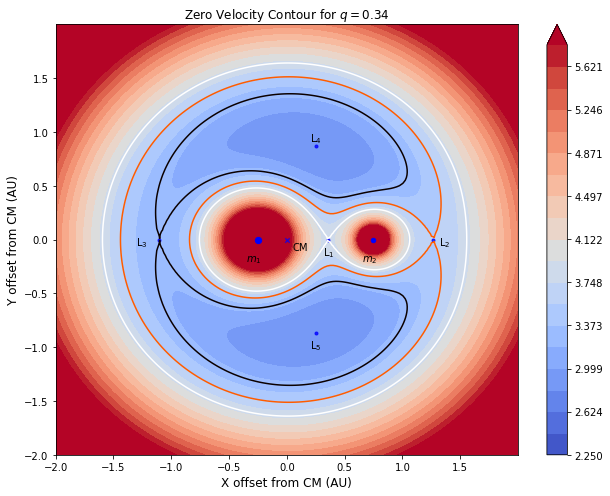

In [ ]:
#plot ZVC bintang ganda 164121+0030.4
bintangganda = m2/ (m1+m2)
plotLagrangeCj (bintangganda)

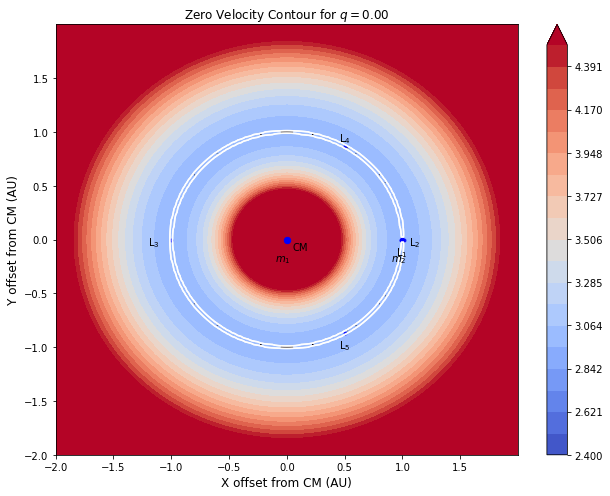

In [ ]:
#plot ZVC Matahari-Bumi
msun = 1.989e30 #kg
mbumi = 5.97e24 #kg
mataharibumi = mbumi/ (msun+mbumi)
plotLagrangeCj (mataharibumi)

Untuk sistem bintang ganda akan terlihat jelas perbedaan antara daerah-dearah yang memiliki kontur warna yang berbeda. Sedangkan untuk sistem matahari bumi, garis konturnya terlihat dominan mengelilingi matahari sebagai pusat massa.

#### 2. Jelaskan makna garis kontur putih yang salah satunya melewati titik $L_1$! Jika ditempatkan benda $m_3$ maka tentukan daerah "yang diizinkan" dan "terlarang" untuk benda ini!

Garis kontur putih :
1. Garis kontur putih yang melewati titik L1 merupakan batas daerah yang disebut dengan roche lobe (dalam sistem bintang ganda). Daerah ini juga disebut permukaan Hill (dalam 2D), atau bola Hill (dalam 3D). Pada daerah ini, gaya gravitasi yang dominan dirasakan oleh m3 didalam Radius Hill berasal dari benda didalam radius tersebut,
2. Garis kontur putih bagian luar menunjukkan batas dari daerah permukaan Hill (dalam 2D) atau bola Hill (dalam 3D). Jika ada benda m3 yang berada didalam lingkaran putih terluar ini, maka m3 tersebut akan mengelilingi pusat massa.


Daerah "yang diizinkan" dan "terlarang" untuk benda m3 bergantung pada energi yang dimiliki benda tersebut. Ada beberapa kemungkinan bergantung pada energi yang dimiliki m3 :
1. Untuk Energi m3 < Energi L1, maka daerah yang diizinkan untuk benda m3 adalah daerah didalam garis kontur putih yang melewati L1 dan daerah diluar garis kontur putih terluar. Daerah terlarangnya adalah daerah diantara dua garis kontur putih dalam dan luar.
2. Untuk Energi L1 < Energi m3 < Energi L2, maka daerah yang diizinkan untuk benda m3 adalah daerah didalam garis kontur merah berbentuk angka delapan dan diluar garis kontur putih terluar.  Daerah terlarangnya adalah daerah diantara garis kontur merah berbentuk angka depapan dan garis putih luar.
3. Untuk Energi L2 < Energi m3 < Energi L3, maka daerah yang diizinkan untuk benda m3 adalah seluruh tempat kecuali didalam daerah yang dibatasi garis kontur hitam. Daerah terlarangnya yaitu didalam daerah yang dibatasi garis kontur hitam.
4. Untuk Energi L3 < Energi m3 < Energi L4 dan L5, maka daerah diizinkan untuk benda m3 adalah diluar daerah yang berwarna biru tua disekitar L4 dan L5. Daerah terlarangnya didalam daerah biru tua sekitar L4 dan L5.
5. Untuk Energi m3 > Energi L4 dan L5, maka seluruh daerah diizinkan untuk m3.


#### 3. Berdasarkan warna pada kontur, jelaskan titik Lagrange yang bersifat stabil, dan tidak stabil!

Titik Lagrange yang stabil berada pada daerah biru yang paling gelap yaitu L4 dan L5. L4 dan L5 merupakan lembah potensial. Benda yang ada di titik itu akan sulit keluar kecuali diberi gaya yang cukup besar.

Titik Lagrange yang tidak stabil berada pada daerah biru muda yaitu L1, L2, dan L3. L1, L2, dan L3 merupakan puncak potensial. Benda yang berada di titik-titik tersebut akan terdorong ke luar jika sedikit diganggu.

#### 4. Tunjukkan titik Lagrange yang bersifat _semi stabil_ yakni ketika ada gangguan arah sejajar $m_1,m_2,$ dan $m_3$ maka $m_3$ akan terlempar dari titik Lagrange tersebut, sementara itu ketika ada gangguan arah tegak lurus $m_1,m_2,$ dan $m_3$ maka $m_3$ akan kembali ke titik Lagrange tersebut!

Titik lagrange semi stabil yaitu L1, L2 dan L3

# Selamat Mengerjakan ^^